In [57]:
## Logistic Regression
library(caret)
library(dplyr)
library(MASS)
library(Metrics)

In [58]:
credit<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\EDX_Scripts\\Principles-of-Machine-Learning-R-master\\Module4\\German_Credit_Preped.csv',stringsAsFactors = F)

str(credit)

'data.frame':	1000 obs. of  22 variables:
 $ Customer_ID             : int  1122334 6156361 2051359 8740590 3924540 3115687 8251714 2272783 1865292 8369450 ...
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 2 2 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" 

In [59]:

### IMPORTANT before modeling anything in classification we need to look at class distribution in our target variable

###Let's make factorize bad credits feature for avoiding future problems

credit$bad_credit<-factor(credit$bad_credit, levels = c(0, 1), labels = c('No','Yes'))

levels(credit$bad_credit)

as.numeric(credit$bad_credit)

str(credit$bad_credit)

table(credit$bad_credit)
### Not good there are more than twice 'good' bank customers as we have 'bad' customer (i.e. bad means defaulted
### and from bank perspective they are 'bad' ).. This is really nasty situation as we shoud predict more precisely
### bad customers as risks and costs asssociated with a bad customers are higher compared to leaving oner good customer
### In practice we will use imputation and other balancing techniques.... or another approach may be adjusting model
### at the ned towards precisely predicting exactly this class!!!! We will use second approach in this case!!

[1] "No"  "Yes"

[1] 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1
  [38] 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 2 1 1 1 1 1
  [75] 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1
 [112] 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 [149] 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 1 1 1 1 2 2 2
 [186] 1 2 1 2 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1
 [260] 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 [297] 1 1 2 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 [334] 1 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1
 [371] 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 [408] 1 2 1 1 1 2 1 1 2 1 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1
 [445] 1 1 2 2 1 2 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 2 2 1 1
 [482] 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 2 2 2 1 2 1 1 2 1 1 1
 [519] 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 1 1
 [556] 2 1 1 2 2 2 2 2 1 2 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 2
 [593] 2 1 1 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 1
 [630] 2 1 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1 1 2 1 2 2 2 1 2 2 2 1 1 2 1 1 1 1 2 1 1
 [667] 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [704] 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1 2 2 1 1 2 1 1 1 1
 [741] 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 1 1 2 1
 [778] 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2
 [815] 2 1 1 1 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2
 [852] 1 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2
 [889] 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 2 1 1 2 1 2
 [926] 2 1 2 1 1 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 1 1 2 1 1 1
 [963] 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
[1000] 1

 Factor w/ 2 levels "No","Yes": 1 2 1 1 2 1 1 1 1 2 ...



 No Yes 
700 300 

In [60]:
ind<-createDataPartition(credit$bad_credit,p=0.70,list = F)

credit1<-credit%>%
  dplyr::select(-Customer_ID)

dim(credit1)

# credit1$bad_credit<-ifelse(credit1$bad_credit==1,'bad','good')
# credit1$bad_credit<-factor(credit1$bad_credit,levels=c('bad','good'))
# credit1$bad_credit
# 
# str(credit1)
# ### Transforming into dummies except bad_credit feature using dummyVars from caret
# 
# dummies<-dummyVars(bad_credit~., data=credit1)
# credit_dummies<-data.frame(predict(dummies,newdata=credit1))
# 
# near_zero = nearZeroVar(credit_dummies, freqCut = 95/5, uniqueCut = 10, saveMetrics = TRUE)
# low_variance_cols <- near_zero[(near_zero$zeroVar == TRUE) | (near_zero$nzv == TRUE), ]
# low_variance_cols

### As we see no big resultfrom using this nearZeroVar funtion from caret but anyway useful feature!!!!


[1] 1000   21

In [61]:

credit_train<-credit1[ind,]
credit_test<-credit1[-ind,]

colnames(credit_train)

mod1<-glm(bad_credit~.,data=credit_train,family = 'binomial')

mod2<-stepAIC(mod1,method='both')

mod2$anova

summary(mod2)

[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "purpose"                 
 [5] "loan_amount"              "savings_account_balance" 
 [7] "time_employed_yrs"        "payment_pcnt_income"     
 [9] "gender_status"            "other_signators"         
[11] "time_in_residence"        "property"                
[13] "age_yrs"                  "other_credit_outstanding"
[15] "home_ownership"           "number_loans"            
[17] "job_category"             "dependents"              
[19] "telephone"                "foreign_worker"          
[21] "bad_credit"

Start:  AIC=734.95
bad_credit ~ checking_account_status + loan_duration_mo + credit_history + 
    purpose + loan_amount + savings_account_balance + time_employed_yrs + 
    payment_pcnt_income + gender_status + other_signators + time_in_residence + 
    property + age_yrs + other_credit_outstanding + home_ownership + 
    number_loans + job_category + dependents + telephone + foreign_worker

                           Df Deviance    AIC
- job_category              3   637.94 729.94
- gender_status             3   640.06 732.06
- time_employed_yrs         4   642.91 732.91
- dependents                1   636.96 732.96
- telephone                 1   637.12 733.12
- property                  3   641.69 733.69
- home_ownership            2   639.78 733.78
- time_in_residence         1   637.99 733.99
- other_signators           2   640.88 734.88
<none>                          636.95 734.95
- age_yrs                   1   639.04 735.04
- loan_amount               1   639.51 735.51
- othe


Step:  AIC=719.33
bad_credit ~ checking_account_status + loan_duration_mo + credit_history + 
    purpose + loan_amount + savings_account_balance + payment_pcnt_income + 
    other_signators + time_in_residence + age_yrs + other_credit_outstanding + 
    number_loans + foreign_worker

                           Df Deviance    AIC
<none>                          655.33 719.33
- number_loans              1   657.65 719.65
- time_in_residence         1   657.78 719.78
- loan_amount               1   658.25 720.25
- age_yrs                   1   658.54 720.54
- other_signators           2   660.83 720.83
- other_credit_outstanding  2   660.83 720.83
- payment_pcnt_income       1   659.05 721.05
- foreign_worker            1   659.38 721.38
- loan_duration_mo          1   663.50 725.50
- credit_history            4   669.60 725.60
- savings_account_balance   4   672.11 728.11
- purpose                   9   688.24 734.24
- checking_account_status   3   703.60 761.60


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,651,636.9530,734.9530
- job_category,3,0.98967874,654,637.9427,729.9427
- gender_status,3,3.07402020,657,641.0167,727.0167
- dependents,1,0.08467675,658,641.1014,725.1014
- telephone,1,0.31250174,659,641.4139,723.4139
- property,3,4.39916160,662,645.8131,721.8131
- home_ownership,2,2.01531469,664,647.8284,719.8284
- time_employed_yrs,4,7.50332370,668,655.3317,719.3317



Call:
glm(formula = bad_credit ~ checking_account_status + loan_duration_mo + 
    credit_history + purpose + loan_amount + savings_account_balance + 
    payment_pcnt_income + other_signators + time_in_residence + 
    age_yrs + other_credit_outstanding + number_loans + foreign_worker, 
    family = "binomial", data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1518  -0.7312  -0.4102   0.7645   2.6242  

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                           -1.284e+00  1.115e+00
checking_account_status> 200 DM or salary assignment  -8.571e-01  4.472e-01
checking_account_status0 - 200 DM                     -3.922e-01  2.524e-01
checking_account_statusnone                           -1.697e+00  2.668e-01
loan_duration_mo                                       3.152e-02  1.110e-02
credit_historycritical account - other non-bank loans -1.324e+00  5.298e-01
cre

In [62]:
# Let's analyse the model that we got


unique(credit_train$payment_pcnt_income)

colnames(credit_train)
mod3<-glm(bad_credit~checking_account_status+loan_duration_mo+credit_history+purpose+loan_amount+
            other_signators+number_loans+gender_status,data=credit_train,family='binomial')

summary(mod3)

[1] 4 2 3 1

[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "purpose"                 
 [5] "loan_amount"              "savings_account_balance" 
 [7] "time_employed_yrs"        "payment_pcnt_income"     
 [9] "gender_status"            "other_signators"         
[11] "time_in_residence"        "property"                
[13] "age_yrs"                  "other_credit_outstanding"
[15] "home_ownership"           "number_loans"            
[17] "job_category"             "dependents"              
[19] "telephone"                "foreign_worker"          
[21] "bad_credit"


Call:
glm(formula = bad_credit ~ checking_account_status + loan_duration_mo + 
    credit_history + purpose + loan_amount + other_signators + 
    number_loans + gender_status, family = "binomial", data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2599  -0.7532  -0.4519   0.8468   2.5737  

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                           -3.370e-01  8.262e-01
checking_account_status> 200 DM or salary assignment  -1.104e+00  4.316e-01
checking_account_status0 - 200 DM                     -5.305e-01  2.373e-01
checking_account_statusnone                           -1.840e+00  2.538e-01
loan_duration_mo                                       4.247e-02  1.031e-02
credit_historycritical account - other non-bank loans -1.459e+00  4.953e-01
credit_historycurrent loans paid                      -6.099e-01  4.476e-01
credit_historyno credit - paid             

In [66]:
train_pred<-predict(mod3,newdata = credit_train,type='response')

train_pred<-ifelse(train_pred>0.5,1,0)

table(train_pred,credit_train$bad_credit)

table(train_pred)

train_pred<-factor(train_pred, levels = c(0, 1), labels = c('No','Yes'))

levels(train_pred)

as.numeric(train_pred)

str(train_pred)

accuracy(actual = credit_train$bad_credit,predicted = train_pred)

          
train_pred  No Yes
         0 449 111
         1  41  99

train_pred
  0   1 
560 140 

[1] "No"  "Yes"

[1] 1 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1
 [75] 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1
[112] 1 1 1 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1
[260] 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
[297] 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1
[334] 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2
[371] 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 2
[408] 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1
[445] 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[482] 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 2 1 2 1
[519] 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
[556] 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1
[593] 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1
[630] 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 2 1
[667] 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1

 Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 2 1 2 2 ...
 - attr(*, "names")= chr [1:700] "1" "2" "3" "6" ...


ERROR: Error in eval(expr, envir, enclos): could not find function "accuracy"


In [67]:
confusionMatrix(train_pred,credit_train$bad_credit,positive = 'Yes')

### As we know our priority should be the correct classification of bad credits, which have high risks of defaulting.
### The measure of bad credits with Yes status is Sensitivity and we should improve it from the current result of 52%


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  449 111
       Yes  41  99
                                          
               Accuracy : 0.7829          
                 95% CI : (0.7504, 0.8129)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 5.196e-07       
                                          
                  Kappa : 0.4286          
 Mcnemar's Test P-Value : 2.185e-08       
                                          
            Sensitivity : 0.4714          
            Specificity : 0.9163          
         Pos Pred Value : 0.7071          
         Neg Pred Value : 0.8018          
             Prevalence : 0.3000          
         Detection Rate : 0.1414          
   Detection Prevalence : 0.2000          
      Balanced Accuracy : 0.6939          
                                          
       'Positive' Class : Yes             
                                          

In [68]:
credit_train<-credit1[ind,]
credit_test<-credit1[-ind,]

colnames(credit_train)

mod1<-glm(bad_credit~.,data=credit_train,family = 'binomial')

mod2<-stepAIC(mod1,method='both')

mod2$anova

summary(mod2)

# Let's analyse the model that we got

[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "purpose"                 
 [5] "loan_amount"              "savings_account_balance" 
 [7] "time_employed_yrs"        "payment_pcnt_income"     
 [9] "gender_status"            "other_signators"         
[11] "time_in_residence"        "property"                
[13] "age_yrs"                  "other_credit_outstanding"
[15] "home_ownership"           "number_loans"            
[17] "job_category"             "dependents"              
[19] "telephone"                "foreign_worker"          
[21] "bad_credit"

Start:  AIC=734.95
bad_credit ~ checking_account_status + loan_duration_mo + credit_history + 
    purpose + loan_amount + savings_account_balance + time_employed_yrs + 
    payment_pcnt_income + gender_status + other_signators + time_in_residence + 
    property + age_yrs + other_credit_outstanding + home_ownership + 
    number_loans + job_category + dependents + telephone + foreign_worker

                           Df Deviance    AIC
- job_category              3   637.94 729.94
- gender_status             3   640.06 732.06
- time_employed_yrs         4   642.91 732.91
- dependents                1   636.96 732.96
- telephone                 1   637.12 733.12
- property                  3   641.69 733.69
- home_ownership            2   639.78 733.78
- time_in_residence         1   637.99 733.99
- other_signators           2   640.88 734.88
<none>                          636.95 734.95
- age_yrs                   1   639.04 735.04
- loan_amount               1   639.51 735.51
- othe


Step:  AIC=719.33
bad_credit ~ checking_account_status + loan_duration_mo + credit_history + 
    purpose + loan_amount + savings_account_balance + payment_pcnt_income + 
    other_signators + time_in_residence + age_yrs + other_credit_outstanding + 
    number_loans + foreign_worker

                           Df Deviance    AIC
<none>                          655.33 719.33
- number_loans              1   657.65 719.65
- time_in_residence         1   657.78 719.78
- loan_amount               1   658.25 720.25
- age_yrs                   1   658.54 720.54
- other_signators           2   660.83 720.83
- other_credit_outstanding  2   660.83 720.83
- payment_pcnt_income       1   659.05 721.05
- foreign_worker            1   659.38 721.38
- loan_duration_mo          1   663.50 725.50
- credit_history            4   669.60 725.60
- savings_account_balance   4   672.11 728.11
- purpose                   9   688.24 734.24
- checking_account_status   3   703.60 761.60


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,651,636.9530,734.9530
- job_category,3,0.98967874,654,637.9427,729.9427
- gender_status,3,3.07402020,657,641.0167,727.0167
- dependents,1,0.08467675,658,641.1014,725.1014
- telephone,1,0.31250174,659,641.4139,723.4139
- property,3,4.39916160,662,645.8131,721.8131
- home_ownership,2,2.01531469,664,647.8284,719.8284
- time_employed_yrs,4,7.50332370,668,655.3317,719.3317



Call:
glm(formula = bad_credit ~ checking_account_status + loan_duration_mo + 
    credit_history + purpose + loan_amount + savings_account_balance + 
    payment_pcnt_income + other_signators + time_in_residence + 
    age_yrs + other_credit_outstanding + number_loans + foreign_worker, 
    family = "binomial", data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1518  -0.7312  -0.4102   0.7645   2.6242  

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                           -1.284e+00  1.115e+00
checking_account_status> 200 DM or salary assignment  -8.571e-01  4.472e-01
checking_account_status0 - 200 DM                     -3.922e-01  2.524e-01
checking_account_statusnone                           -1.697e+00  2.668e-01
loan_duration_mo                                       3.152e-02  1.110e-02
credit_historycritical account - other non-bank loans -1.324e+00  5.298e-01
cre

In [69]:
unique(credit_train$payment_pcnt_income)

colnames(credit_train)
mod3<-glm(bad_credit~checking_account_status+loan_duration_mo+credit_history+purpose+loan_amount+
            other_signators+number_loans+gender_status,data=credit_train,family='binomial')

summary(mod3)

[1] 4 2 3 1

[1] "checking_account_status"  "loan_duration_mo"        
 [3] "credit_history"           "purpose"                 
 [5] "loan_amount"              "savings_account_balance" 
 [7] "time_employed_yrs"        "payment_pcnt_income"     
 [9] "gender_status"            "other_signators"         
[11] "time_in_residence"        "property"                
[13] "age_yrs"                  "other_credit_outstanding"
[15] "home_ownership"           "number_loans"            
[17] "job_category"             "dependents"              
[19] "telephone"                "foreign_worker"          
[21] "bad_credit"


Call:
glm(formula = bad_credit ~ checking_account_status + loan_duration_mo + 
    credit_history + purpose + loan_amount + other_signators + 
    number_loans + gender_status, family = "binomial", data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2599  -0.7532  -0.4519   0.8468   2.5737  

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                           -3.370e-01  8.262e-01
checking_account_status> 200 DM or salary assignment  -1.104e+00  4.316e-01
checking_account_status0 - 200 DM                     -5.305e-01  2.373e-01
checking_account_statusnone                           -1.840e+00  2.538e-01
loan_duration_mo                                       4.247e-02  1.031e-02
credit_historycritical account - other non-bank loans -1.459e+00  4.953e-01
credit_historycurrent loans paid                      -6.099e-01  4.476e-01
credit_historyno credit - paid             

[[1]]
[1] 0.7986783

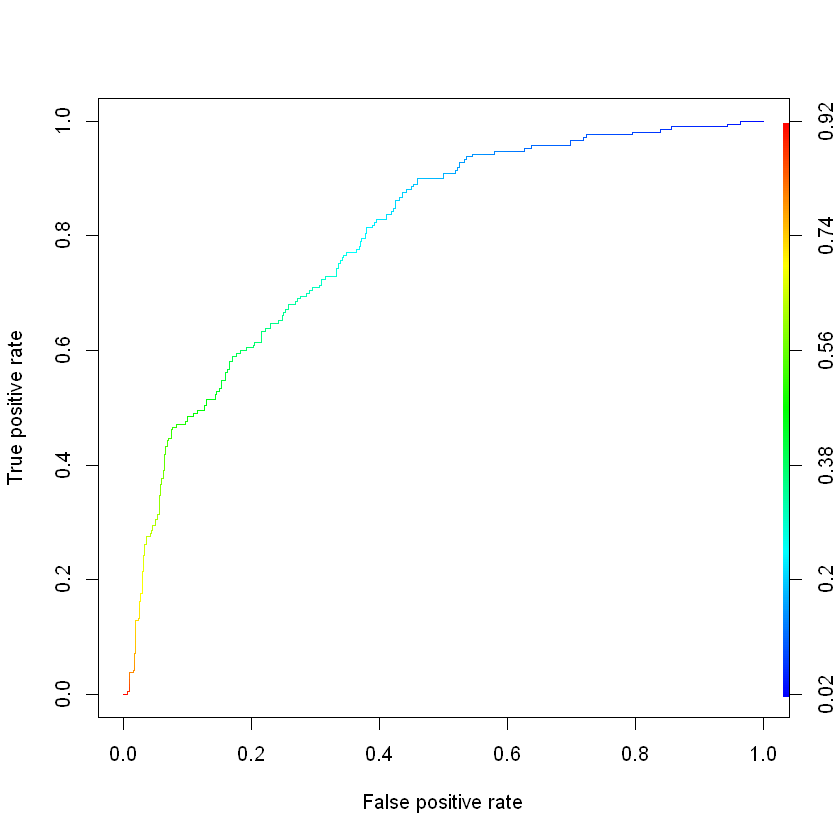

In [70]:
train_pred<-predict(mod3,newdata = credit_train,type='response')

library(ROCR)
P_train<-prediction(train_pred,credit_train$bad_credit)
perf<-performance(P_train,'tpr','fpr')

plot(perf,colorize=T)

performance(P_train,'auc')@y.values
##

In [71]:
train_pred<-ifelse(train_pred>0.25,1,0)

table(train_pred,credit_train$bad_credit)

table(train_pred)

train_pred<-factor(train_pred, levels = c(0, 1), labels = c('No','Yes'))

levels(train_pred)

as.numeric(train_pred)

str(train_pred)

accuracy(actual = credit_train$bad_credit,predicted = train_pred)

confusionMatrix(train_pred,credit_train$bad_credit,positive = 'Yes')

### Let's eventually test our model

          
train_pred  No Yes
         0 316  48
         1 174 162

train_pred
  0   1 
364 336 

[1] "No"  "Yes"

[1] 1 2 1 2 1 1 2 2 2 2 1 2 1 1 2 2 1 1 2 1 2 1 2 2 2 2 1 1 2 1 1 1 2 2 1 2 1
 [38] 1 2 1 1 1 2 1 1 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 1 1 1 2 1 2 2 2 1 1 1 2 1 1
 [75] 1 1 2 1 1 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 1 1 1 1 2 2 2 1 1 1
[112] 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2
[149] 1 1 1 2 2 1 2 1 1 2 2 2 2 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1
[186] 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 2 2 1
[223] 1 1 2 2 1 2 1 2 1 1 2 1 2 2 2 2 2 1 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2
[260] 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 2 2 1 1 2 1 1 1 2 1 2 2 1
[297] 1 2 1 1 1 1 2 1 2 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 1 2 1 2 1
[334] 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2
[371] 1 1 1 2 2 2 1 1 2 1 1 1 2 1 1 2 2 1 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 1 2 2
[408] 1 2 2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 2 2 1 2 1 1 2 1 1 2 1 2
[445] 2 2 1 1 2 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 1 2 2 2
[482] 1 1 1 1 1 2 2 2 2 1 2 2 2 1 1 1 2 1 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1
[519] 2 2 1 1 2 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 2 1
[556] 2 1 2 2 1 1 2 2 1 1 2 2 2 1 2 1 2 2 2 2 1 2 2 1 2 1 1 1 2 1 1 1 1 2 2 2 1
[593] 1 2 2 2 1 1 1 2 1 1 2 1 1 2 2 1 2 2 2 1 1 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 1
[630] 1 1 1 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 1 1 2 2 2 1 1 1 2 2
[667] 2 2 2 2 1 2 1 1 2 2 1 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 1 1 2 2 1 2 1 1

 Factor w/ 2 levels "No","Yes": 1 2 1 2 1 1 2 2 2 2 ...
 - attr(*, "names")= chr [1:700] "1" "2" "3" "6" ...


ERROR: Error in eval(expr, envir, enclos): could not find function "accuracy"


[[1]]
[1] 0.7982011

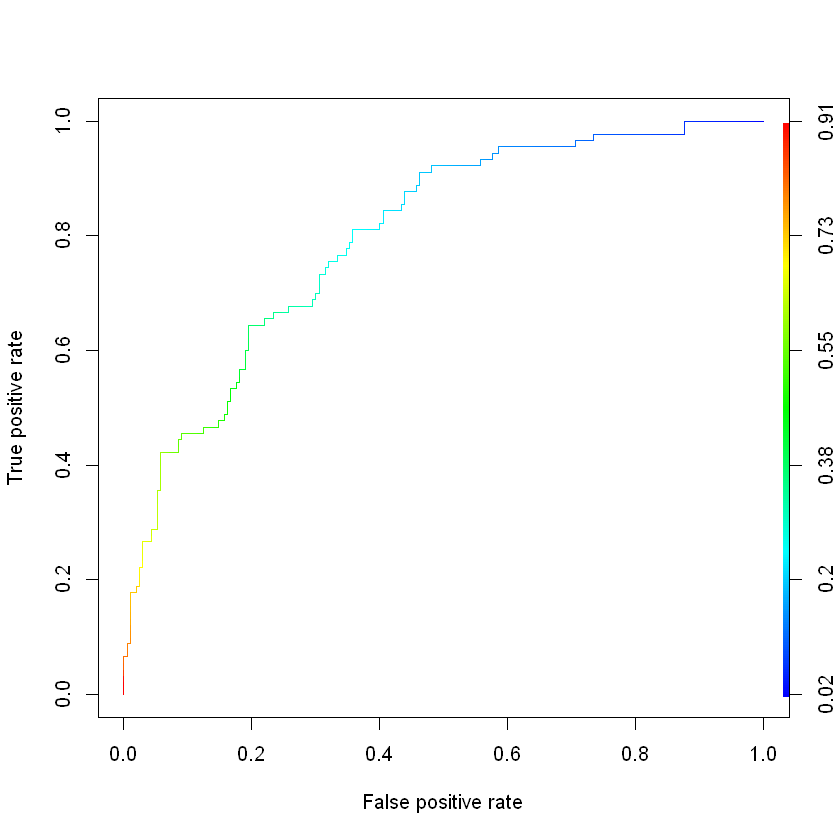

In [72]:
pred_test<-predict(mod3,newdata = credit_test,type='response')

library(ROCR)
P_test<-prediction(pred_test,credit_test$bad_credit)
perf<-performance(P_test,'tpr','fpr')

plot(perf,colorize=T)

performance(P_test,'auc')@y.values
##

In [73]:
pred_test<-ifelse(pred_test>0.25,1,0)

table(pred_test,credit_test$bad_credit)



         
pred_test  No Yes
        0 137  20
        1  73  70

In [74]:
table(pred_test)

pred_test
  0   1 
157 143 

In [75]:
pred_test<-factor(pred_test, levels = c(0, 1), labels = c('No','Yes'))

levels(pred_test)

as.numeric(pred_test)

str(pred_test)


[1] "No"  "Yes"

[1] 2 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 1
 [38] 1 1 2 2 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 1 1 2 2 2 1 2 1 1 2 1 2 1 1 2 1 2 1
 [75] 1 2 2 2 2 2 2 1 2 1 2 1 2 1 2 2 1 2 1 1 2 2 2 2 2 1 2 1 1 1 2 2 2 2 1 1 2
[112] 1 1 2 2 1 2 1 1 2 2 2 1 1 2 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
[149] 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 1 1 2 2 2
[186] 2 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 1
[223] 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 2 1 2 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 2
[260] 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1
[297] 1 1 1 2

 Factor w/ 2 levels "No","Yes": 2 2 1 2 2 2 2 2 2 1 ...
 - attr(*, "names")= chr [1:300] "4" "5" "7" "10" ...


In [79]:
accuracy(actual = credit_test$bad_credit,predicted = pred_test) ## Although notebooks outputs error in RStudio code normally runes

ERROR: Error in eval(expr, envir, enclos): could not find function "accuracy"


In [78]:
confusionMatrix(pred_test,credit_test$bad_credit,positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  137  20
       Yes  73  70
                                          
               Accuracy : 0.69            
                 95% CI : (0.6343, 0.7419)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.6728          
                                          
                  Kappa : 0.3682          
 Mcnemar's Test P-Value : 6.962e-08       
                                          
            Sensitivity : 0.7778          
            Specificity : 0.6524          
         Pos Pred Value : 0.4895          
         Neg Pred Value : 0.8726          
             Prevalence : 0.3000          
         Detection Rate : 0.2333          
   Detection Prevalence : 0.4767          
      Balanced Accuracy : 0.7151          
                                          
       'Positive' Class : Yes             
                                          